In [1]:
from google.colab import files

uploaded = files.upload()

Saving winequality.csv to winequality.csv


In [53]:
import pandas as pd

In [54]:
data = pd.read_csv('winequality.csv')

In [55]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [57]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [58]:
#Since 'quality' is the label let's see the value counts

data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

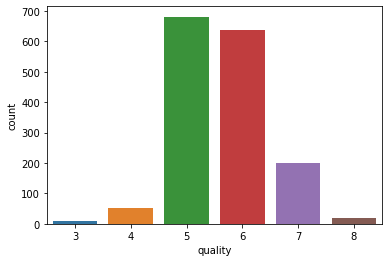

In [59]:
#Let's visualize the label count

import seaborn as sb

sb.countplot(x = 'quality', data =data) #palette = 'hls'

In [60]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [61]:
#Checking for Outliers

from scipy import stats
import numpy as np


z = np.abs(stats.zscore(data))

outliers = list(set(np.where(z > 3)[0]))

len(outliers)

148

In [62]:
#Let's drop the outliers

data = data.drop(outliers, axis=0).reset_index(drop = False) #where O axis is rows and 1 axis is the columns

In [64]:
#To confirm if outliers were dropped

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1451 entries, 0 to 1450
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1451 non-null   int64  
 1   fixed acidity         1451 non-null   float64
 2   volatile acidity      1451 non-null   float64
 3   citric acid           1451 non-null   float64
 4   residual sugar        1451 non-null   float64
 5   chlorides             1451 non-null   float64
 6   free sulfur dioxide   1451 non-null   float64
 7   total sulfur dioxide  1451 non-null   float64
 8   density               1451 non-null   float64
 9   pH                    1451 non-null   float64
 10  sulphates             1451 non-null   float64
 11  alcohol               1451 non-null   float64
 12  quality               1451 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 147.5 KB


In [65]:
data.corr()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
index,1.000000,-0.276666,-0.013167,-0.152678,-0.119536,-0.151203,0.088908,-0.137516,-0.416903,0.127647,-0.065640,0.266147,0.075919
fixed acidity,-0.276666,1.000000,-0.297150,0.698363,0.180293,0.183549,-0.148815,-0.099928,0.659927,-0.705572,0.200371,-0.015114,0.145163
volatile acidity,-0.013167,-0.297150,1.000000,-0.589452,0.025977,0.072709,0.013943,0.110338,-0.004957,0.251343,-0.348126,-0.213213,-0.353443
citric acid,-0.152678,0.698363,-0.589452,1.000000,0.184960,0.100361,-0.074441,0.005301,0.371729,-0.520311,0.302815,0.168766,0.243999
residual sugar,-0.119536,0.180293,0.025977,0.184960,1.000000,0.126735,-0.000844,0.095093,0.344801,-0.075140,0.076129,0.162533,0.061482
chlorides,-0.151203,0.183549,0.072709,0.100361,0.126735,1.000000,-0.058163,0.045025,0.328695,-0.182841,0.022107,-0.205414,-0.108787
free sulfur dioxide,0.088908,-0.148815,0.013943,-0.074441,-0.000844,-0.058163,1.000000,0.660188,-0.037630,0.108831,0.055956,-0.077993,-0.071202
total sulfur dioxide,-0.137516,-0.099928,0.110338,0.005301,0.095093,0.045025,0.660188,1.000000,0.118965,-0.005940,-0.039024,-0.259952,-0.237745
density,-0.416903,0.659927,-0.004957,0.371729,0.344801,0.328695,-0.037630,0.118965,1.000000,-0.312310,0.129896,-0.468312,-0.167568
pH,0.127647,-0.705572,0.251343,-0.520311,-0.075140,-0.182841,0.108831,-0.005940,-0.312310,1.000000,-0.039082,0.135624,-0.082164


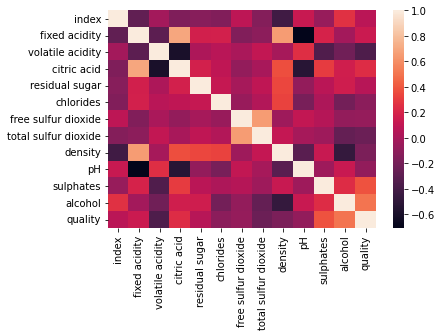

In [66]:
#Lets visualize the correlation

sb.heatmap(data.corr())

In [67]:
#Features Selection

y = data['quality'].values

X = data.drop(['quality'], axis = 1)

In [68]:
X.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


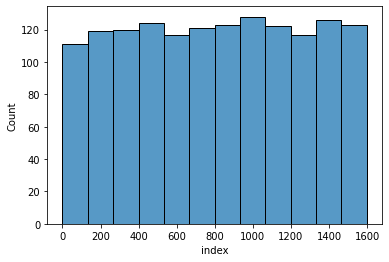

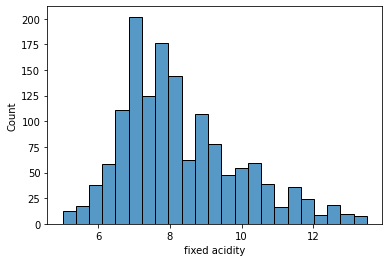

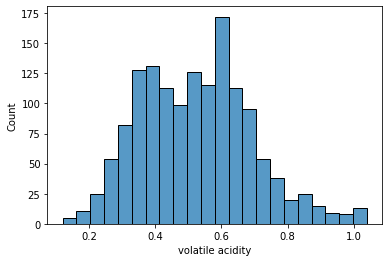

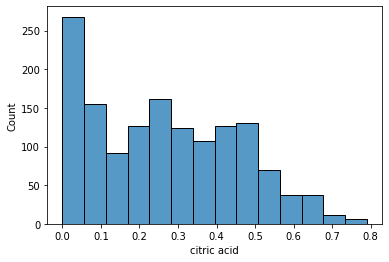

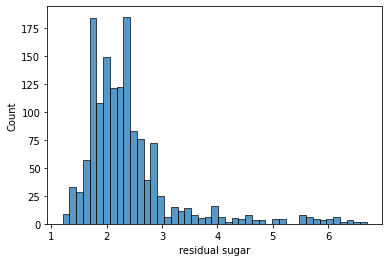

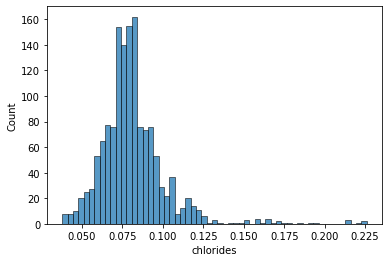

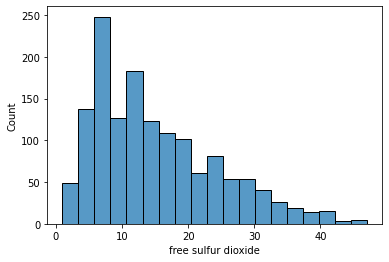

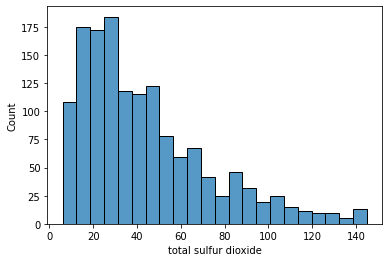

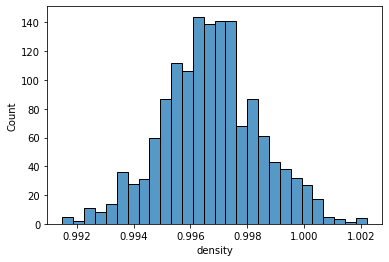

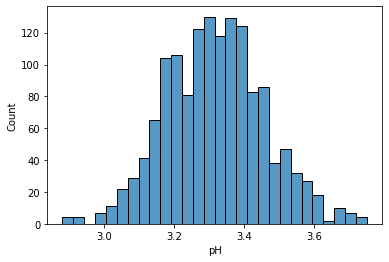

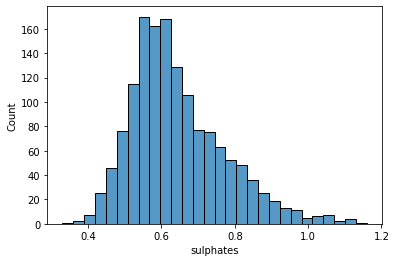

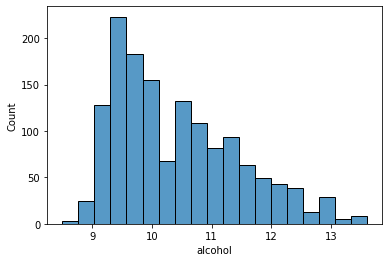

In [69]:
import matplotlib.pyplot as plt

for i in X.columns:
    sb.histplot(X[i])
    plt.show()

In [70]:
y = data['quality']
y.column_names = 'quality'
y_new = list(y)
X_new = data.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)

In [71]:
X_scaled

array([[-0.55292997,  1.05091371, -1.39039974, ..., -0.63645843,
        -0.99985592, -0.84412477],
       [-0.3099004 ,  2.11933582, -1.39039974, ...,  0.2883529 ,
        -0.6081737 , -0.84412477],
       [-0.3099004 ,  1.40705441, -1.18083057, ...,  0.05715007,
        -0.6081737 , -0.84412477],
       ...,
       [-1.22126131, -0.07686519, -0.70929993, ...,  0.82782618,
         0.56687296,  0.43573421],
       [-1.46429088,  0.72445139, -0.76169222, ...,  0.51955574,
        -0.21649148, -0.84412477],
       [-1.40353349, -1.26400088,  1.07203802, ...,  0.13421768,
         0.56687296,  0.43573421]])

## Logistic Regression

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [80]:
# Using logistic regression algorithm
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression

X_train, x_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)
#splitting data with test size of 25%
model = LogisticRegression(random_state=42)  #build our logistic model
cv = cross_validate(model, X_train,y_train, cv=3, return_estimator=True)

print('Mean training accuracy: {}'.format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(x_test,y_test)))

Mean training accuracy: 0.9862049303846444
Test accuracy: 0.9839449541284404


In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, cv["estimator"][0].predict(x_test)))

              precision    recall  f1-score   support

           4       1.00      0.87      0.93        15
           5       0.99      1.00      0.99       179
           6       1.00      1.00      1.00       179
           7       0.92      1.00      0.96        58
           8       0.00      0.00      0.00         5

    accuracy                           0.98       436
   macro avg       0.78      0.77      0.78       436
weighted avg       0.97      0.98      0.98       436



In [82]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='weighted'))
print("Recall:",recall_score(y_test,y_pred, average='weighted'))
print("F1 Score:",f1_score(y_test,y_pred, average='weighted'))

Accuracy: 0.9839449541284404
Precision: 0.9734379010191268
Recall: 0.9839449541284404
F1 Score: 0.9782968641496581


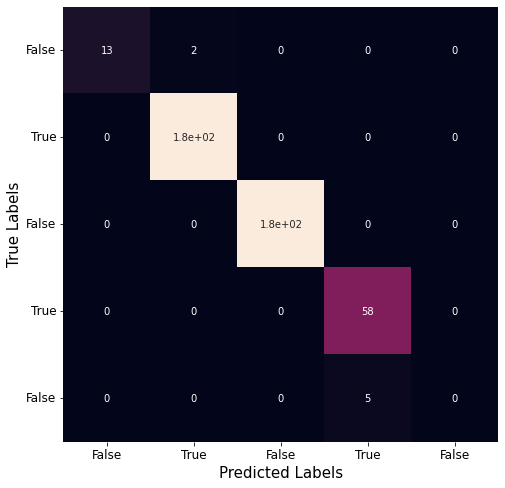

In [83]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb
pred = cv["estimator"][0].predict(x_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sb.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(['False','True','False','True','False'], fontsize = 12)
ax.yaxis.set_ticklabels(['False','True','False','True','False'], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Decision Tree

In [84]:
#Importing Libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
model = clf.fit(X_train,y_train)
print(model)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

DecisionTreeClassifier(max_depth=4, random_state=42)
Accuracy of train: 1.0
Accuracy of test: 1.0


In [88]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00       179
           7       1.00      1.00      1.00        58
           8       1.00      1.00      1.00         5

    accuracy                           1.00       436
   macro avg       1.00      1.00      1.00       436
weighted avg       1.00      1.00      1.00       436



In [89]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='weighted')))
print("Recall = {}".format(recall_score(y_test, pred, average='weighted')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='weighted')))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0
F1 Score = 1.0


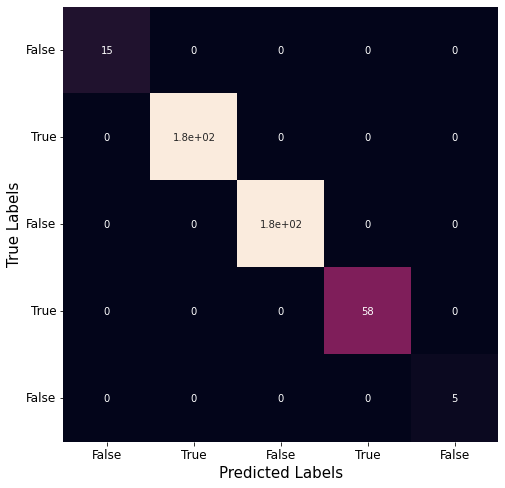

In [91]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(['False','True','False','True','False'], fontsize = 12)
ax.yaxis.set_ticklabels(['False','True','False','True','False'], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Random Forest

In [92]:
# implementing ensemble method using random forest

from sklearn.ensemble import RandomForestClassifier

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_new, test_size=.2, random_state=42)

classifier = RandomForestClassifier(n_estimators=200, random_state=0)

#reformats the data to conform to the requirements of the model
y_train_array = np.ravel(y_train)

classifier.fit(X_train, y_train_array)

y_pred = classifier.predict(X_test)

In [94]:
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00       120
           6       1.00      1.00      1.00       116
           7       0.91      1.00      0.95        40
           8       0.00      0.00      0.00         4

    accuracy                           0.99       291
   macro avg       0.78      0.80      0.79       291
weighted avg       0.97      0.99      0.98       291



In [95]:
# Metrics
print("Precision = {}".format(precision_score(y_test,y_pred, average='weighted')))
print("Recall = {}".format(recall_score(y_test, y_pred, average='weighted')))
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("F1 Score = {}".format(f1_score(y_test, y_pred,average='weighted')))

Precision = 0.9737582005623243
Recall = 0.9862542955326461
Accuracy = 0.9862542955326461
F1 Score = 0.9797087219767632


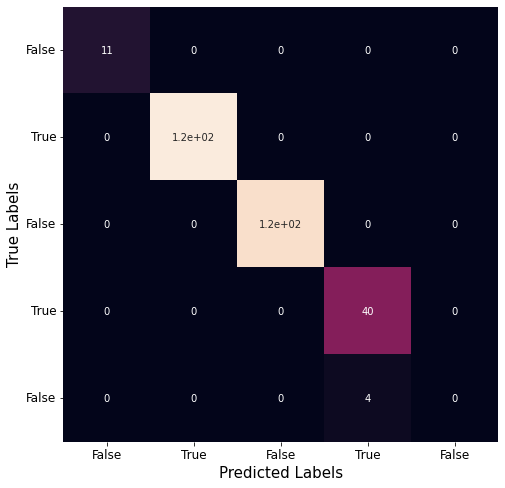

In [96]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(['False','True','False','True','False'], fontsize = 12)
ax.yaxis.set_ticklabels(['False','True','False','True','False'], fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

## Summary



In this project, I build three(3) models namely;  

- Decision Tree Model

- Logistics Regression Model

- Random Forest Model

- Decision-Tree Classifier model to predict the quality. 
 The model yields a very good performance as indicated by the model accuracy which was found to be 1.0.

Summary of metrics for decision tree model

Precision = 1.0 

Recall = 1.0

Accuracy = 1.0 

F1 Score = 1.0

- In the Logistic Regression model with criterion gini index, the training-set accuracy score is 0.983 while the test-set accuracy to be 0.984. These two values are quite comparable. So, there is no sign of overfitting.

Summary of metrics for Logistic Regression model

Precision = 0.973

Recall = 0.983

Accuracy = 0.984

F1 Score = 0.978



- Similarly, in the Random Forest model, the summary of metrics for random forest model entails the following;

Precision = 0.973820395738204 

Recall = 0.9863013698630136 

Accuracy = 0.9863013698630136 

F1 Score = 0.9797706275884038



The metrics obtained from the three different models shows that the decision tree model does excellently well in predicting the quality of wine for the selected features


Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

Lastly, confusion matrixes and classification reports of all the models yields very good model performance